<a href="https://colab.research.google.com/github/PihuNiranjan/Alexa-using-python/blob/master/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import psutil
import subprocess

# CPU Info
print("=== CPU Info ===")
cpu_info = subprocess.check_output("lscpu", shell=True).decode("utf-8")
print(cpu_info)

# GPU Info
print("=== GPU Info ===")
try:
    gpu_info = subprocess.check_output("nvidia-smi", shell=True).decode("utf-8")
    print(gpu_info)
except:
    print("No GPU detected in this session.")

# RAM Info
print("=== RAM Info ===")
ram_gb = psutil.virtual_memory().total / (1024 ** 3)
print(f"Total RAM: {ram_gb:.2f} GB")


=== CPU Info ===
Architecture:                            x86_64
CPU op-mode(s):                          32-bit, 64-bit
Address sizes:                           46 bits physical, 48 bits virtual
Byte Order:                              Little Endian
CPU(s):                                  2
On-line CPU(s) list:                     0,1
Vendor ID:                               GenuineIntel
Model name:                              Intel(R) Xeon(R) CPU @ 2.20GHz
CPU family:                              6
Model:                                   79
Thread(s) per core:                      2
Core(s) per socket:                      1
Socket(s):                               1
Stepping:                                0
BogoMIPS:                                4399.99
Flags:                                   fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpui

In [ ]:
# === Mount Google Drive if needed ===
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# === Imports ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:

# === Load dataset ===
df = pd.read_csv("drive/MyDrive/dataset/dataset_gas_used.csv")


In [ ]:
len(df.columns)



48

In [ ]:

# === Drop irrelevant columns ===
df.drop(columns=["Transaction Hash", "Opcodes Generated", "Top 3 opcodes"], inplace=True, errors='ignore')


In [ ]:
print(df.columns)
print(len(df.columns))

Index(['Smart Contract Address', 'Smart Contract Name', 'Function  Executed',
       'Sstore', 'Sstore Gas', 'Sload', 'SLoadGas', 'LOG', 'LOG Gas', 'SHA3',
       'SHA3 Gas', 'Create', 'Create Gas', 'Call', 'Call Gas', 'Jumpi',
       'Jumpi Gas', 'Balance', 'Balance Gas', 'SelfDestruct',
       'SelfDestruct Gas', 'CodeCopy', 'CodeCopy Gas', 'EXTCODESIZE',
       'EXTCODESIZE Gas', 'Gas Limit', 'Gas Used Percentage',
       'Gas Price(Gwei)', 'Transaction Fee (Ethers)', 'Require Used',
       'Require', 'Loop_Used', 'If_Condition', 'Conditions in If',
       'Event_Triggered', 'Pushing_Values_in_Array', 'Nested_Require',
       'Array Type', 'Payable', 'No of events', 'Compiler Version',
       'Function Type', 'Calling_Function', 'Total Functions Involved',
       'Gas Used'],
      dtype='object')
45


In [ ]:

# === Target variable ===
target = "Gas Used"
df = df.dropna(subset=[target]) #dropping rows where that column is missing.
df


,Smart Contract Address,Smart Contract Name,Function Executed,Sstore,Sstore Gas,Sload,SLoadGas,LOG,LOG Gas,SHA3,...,Pushing_Values_in_Array,Nested_Require,Array Type,Payable,No of events,Compiler Version,Function Type,Calling_Function,Total Functions Involved,Gas Used
0,0xe60fc27b24d942972608ea4dfbff55b7db5af312,iCollateralVaultFactory,deployVault,2,40000,0,0,0,0,0,...,0,0,NaN,0,0,0.5.12,external,0,1,1582188
1,0xb10e11f3e38dc35e06397689e45fa939eb3b0f69,iCollateralVaultFactory,deployVault,2,40000,0,0,0,0,0,...,0,0,NaN,0,0,0.6.10,external,0,1,1579292
2,0xde354f66e935087fea3561d38f3ceb56dc62e597,iCollateralVaultProxy,deployVault,0,101600,7,5600,0,0,0,...,1,0,Address,0,0,0.6.10,public,0,1,1031058
3,0x7c84124F0F7Ff8ADfab6C4c51EBc09C439ca91c1,PaymentMaster,deplyNewHandler,4,65000,4,3200,0,0,0,...,1,0,Address,0,1,0.5.16,public,0,1,571663
4,0xdcd25c8ad36970b5d6bbe066c7d240849fb08fd1,CryptoCapsule,launch,32,301600,9,7200,1,1262,0,...,1,0,Mapping,1,1,0.6.5,external,0,1,339818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020,0xced8c6df9eaedf30ec35d2f4eefb2fd1a092e8c0,MedChain,transfer,2,10000,3,2400,1,1756,0,...,1,1,Mapping,0,1,0.4.26,public,0,1,21967
5021,0xcefe248cf5fd2a4d3746b00a3d08d5e14f0f4b4c,transfer,AQUILA,2,10000,3,2400,1,1756,0,...,1,0,Mapping,0,1,0.5.7,public,0,1,21681
5022,0x59f4ec8bad8f993eb051d369ed528d0cd5336ffd,AdminUpgradeabilityProxy,renounceMinter,1,5000,4,3200,1,1125,0,...,0,0,NaN,0,1,0.5.12,public,1,2,17214
5023,0x92a0c4c9fa058e60e7f091ad3a1ed4b314e5606d,AfrikMillion,syncClose,1,5000,3,2400,0,0,0,...,0,1,NaN,0,0,0.5.11,external,0,1,14421


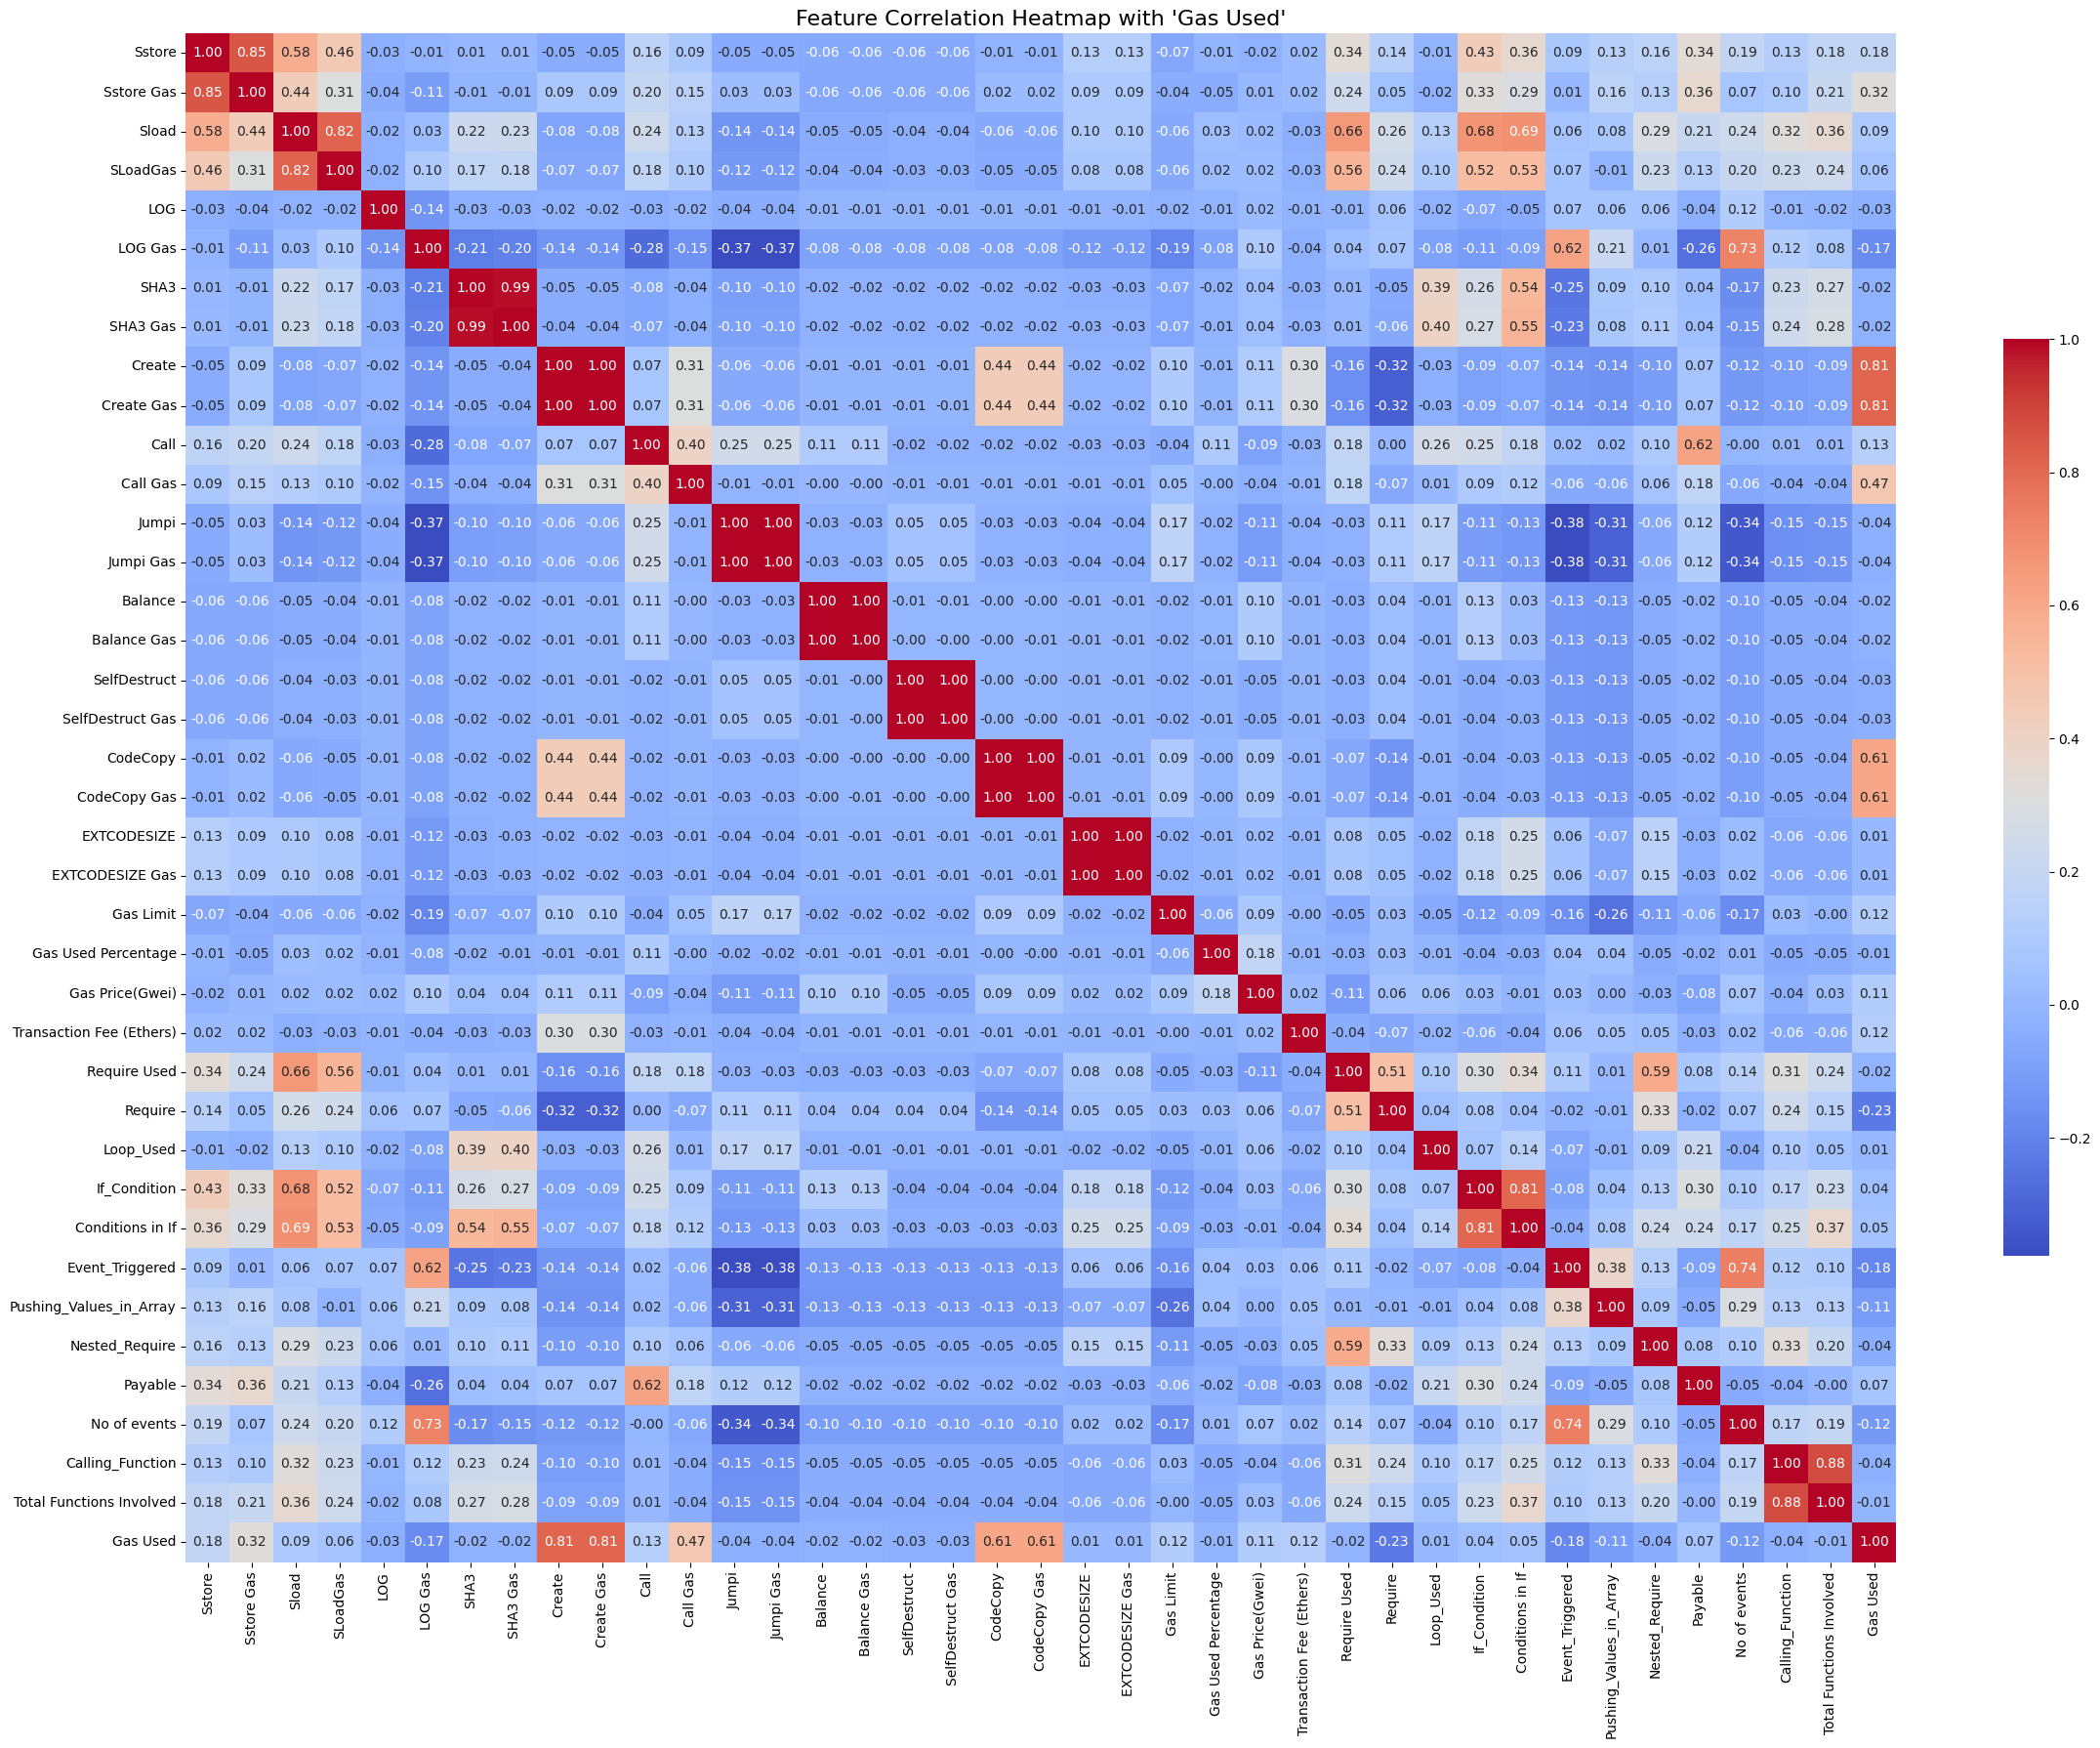

In [ ]:
corr_matrix = df.select_dtypes(include=["number"]).corr()
plt.figure(figsize=(24, 18))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'shrink': .6})
plt.title("Feature Correlation Heatmap with 'Gas Used'", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:


# === Feature grouping after removing leakage and gas-derived features ===
numerical_features = [
    "Gas Limit", "Gas Price(Gwei)", "Total Functions Involved",
    "Sstore", "Sload", "LOG", "SHA3",
    "Create", "Call", "Jumpi", "Balance",
    "SelfDestruct", "CodeCopy", "EXTCODESIZE",
    "Require", "Conditions in If", "No of events"
]

boolean_features = [
    "Require Used", "Loop_Used", "If_Condition", "Event_Triggered",
    "Pushing_Values_in_Array", "Nested_Require", "Payable"
]

categorical_features = [
    "Smart Contract Address", "Smart Contract Name", "Function  Executed",
    "Function Type", "Calling_Function", "Array Type", "Compiler Version"
]

used_features = numerical_features + boolean_features + categorical_features

used_features


['Gas Limit',
 'Gas Price(Gwei)',
 'Total Functions Involved',
 'Sstore',
 'Sload',
 'LOG',
 'SHA3',
 'Create',
 'Call',
 'Jumpi',
 'Balance',
 'SelfDestruct',
 'CodeCopy',
 'EXTCODESIZE',
 'Require',
 'Conditions in If',
 'No of events',
 'Require Used',
 'Loop_Used',
 'If_Condition',
 'Event_Triggered',
 'Pushing_Values_in_Array',
 'Nested_Require',
 'Payable',
 'Smart Contract Address',
 'Smart Contract Name',
 'Function  Executed',
 'Function Type',
 'Calling_Function',
 'Array Type',
 'Compiler Version']

In [ ]:

# === Clean data: fill missing values, type conversion ===
df[numerical_features] = df[numerical_features].fillna(0)
df[boolean_features] = df[boolean_features].fillna(False).astype(int)
df[categorical_features] = df[categorical_features].fillna("Unknown")
df.columns = df.columns.str.strip()


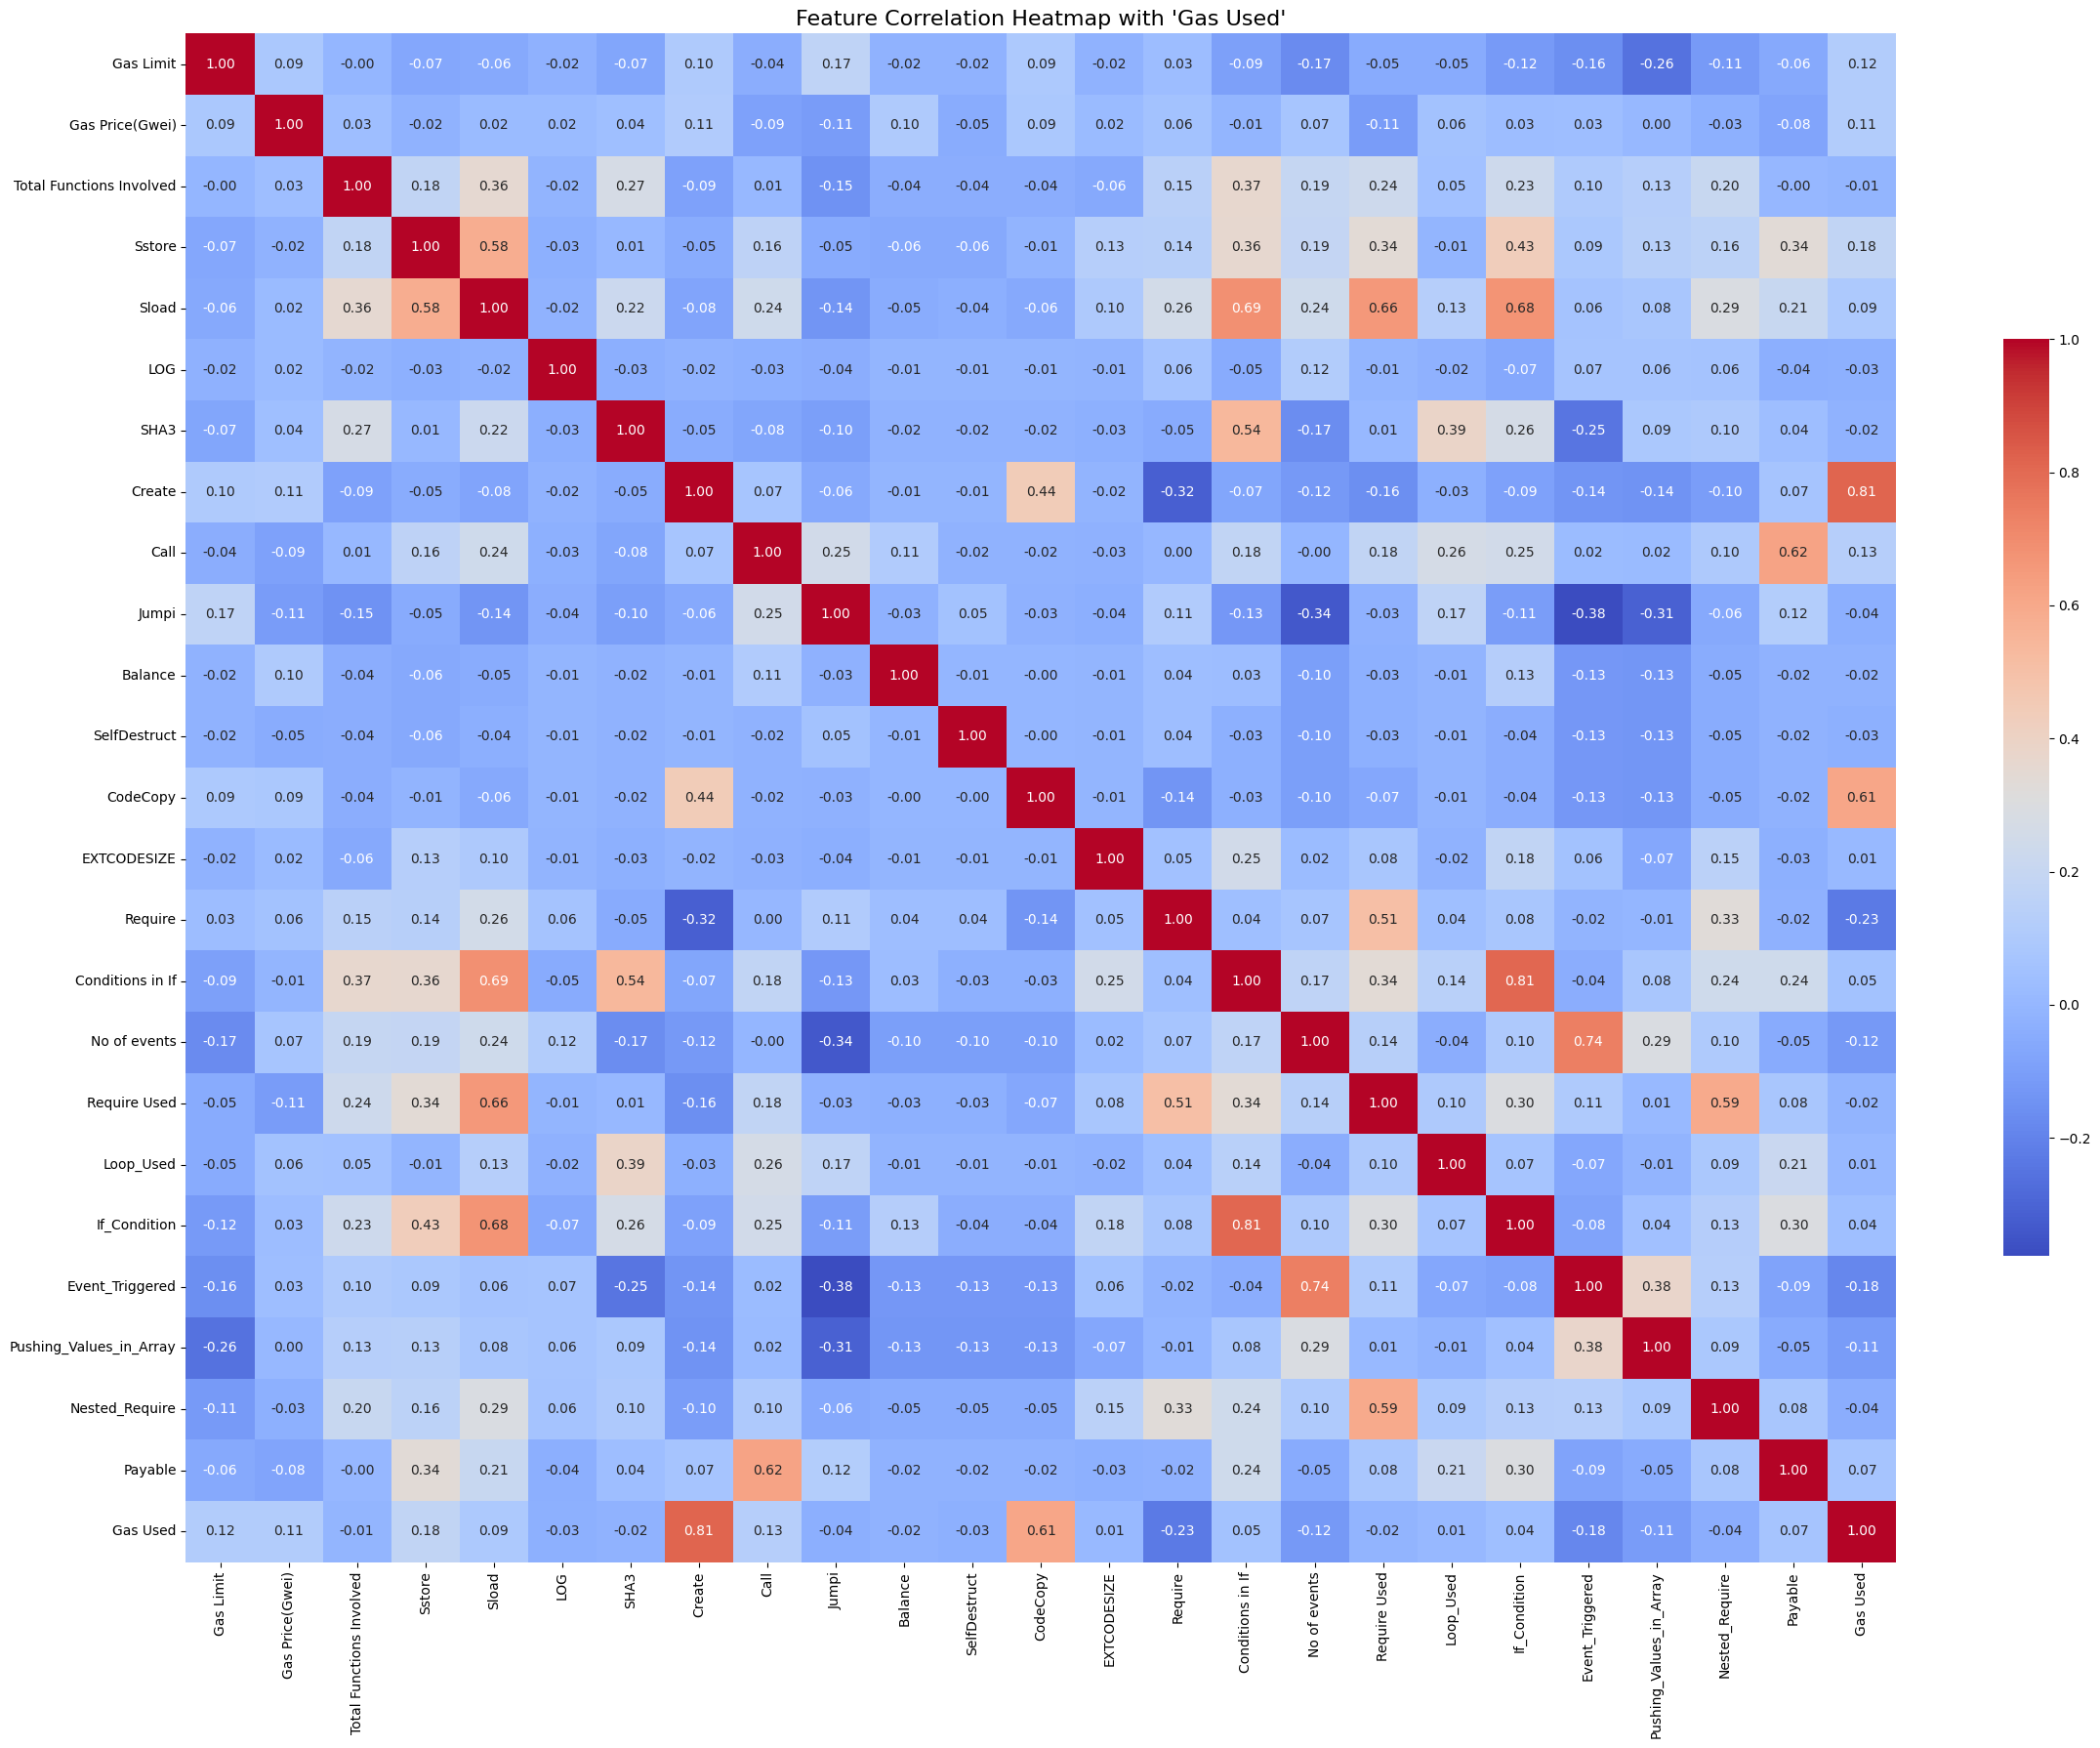

In [ ]:

# === Correlation Heatmap ===
corr_matrix = df[numerical_features + boolean_features + [target]].corr()
plt.figure(figsize=(24, 18))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'shrink': .6})
plt.title("Feature Correlation Heatmap with 'Gas Used'", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# === Split dataset ===
X = df[used_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# === Preprocessing pipeline ===
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ],
    remainder="passthrough"
)

In [ ]:
# === Define regression models ===
from sklearn.linear_model import Ridge, Lasso

models = {
    "XGBoost": XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42),
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=6, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42),
    # "SVR": SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale'),
    "Ridge Regression": Ridge(alpha=1.0), # Added Ridge Regression


    "Decision Tree": DecisionTreeRegressor(max_depth=6, random_state=42),
    "Lasso Regression": Lasso(alpha=0.1),
    "Extra Trees": ExtraTreesRegressor(n_estimators=200, max_depth=6, random_state=42)
}

In [ ]:
import time

results = []

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])

    # Train
    pipeline.fit(X_train, y_train)

    # Measure prediction time
    start_time = time.time()
    y_pred = pipeline.predict(X_test)
    end_time = time.time()

    prediction_time = end_time - start_time

    # Store all metrics + prediction time
    results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2 Score": r2_score(y_test, y_pred),
        "Var Score": explained_variance_score(y_test, y_pred),
        "Prediction Time (s)": prediction_time
    })

# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values("RMSE")
print(results_df)


               Model          MAE          RMSE  R2 Score  Var Score  \
1  Linear Regression    89.500218    321.506024  0.999996   0.999996   
3  Gradient Boosting   705.016564    831.322142  0.999976   0.999976   
6   Lasso Regression   415.713763   1118.175800  0.999956   0.999956   
0            XGBoost  1058.435913   1229.727002  0.999947   0.999947   
4   Ridge Regression  1485.462223   2730.800981  0.999736   0.999736   
2      Random Forest  6847.735856   9877.672102  0.996550   0.996551   
5      Decision Tree  8238.423611  13227.562370  0.993814   0.993815   
7        Extra Trees  9744.433886  13999.445078  0.993070   0.993090   

   Prediction Time (s)  
1             0.010223  
3             0.018599  
6             0.010204  
0             0.017239  
4             0.010470  
2             0.038826  
5             0.009803  
7             0.053028  


In [ ]:

# === Visual Comparison ===
sns.set(style="whitegrid")

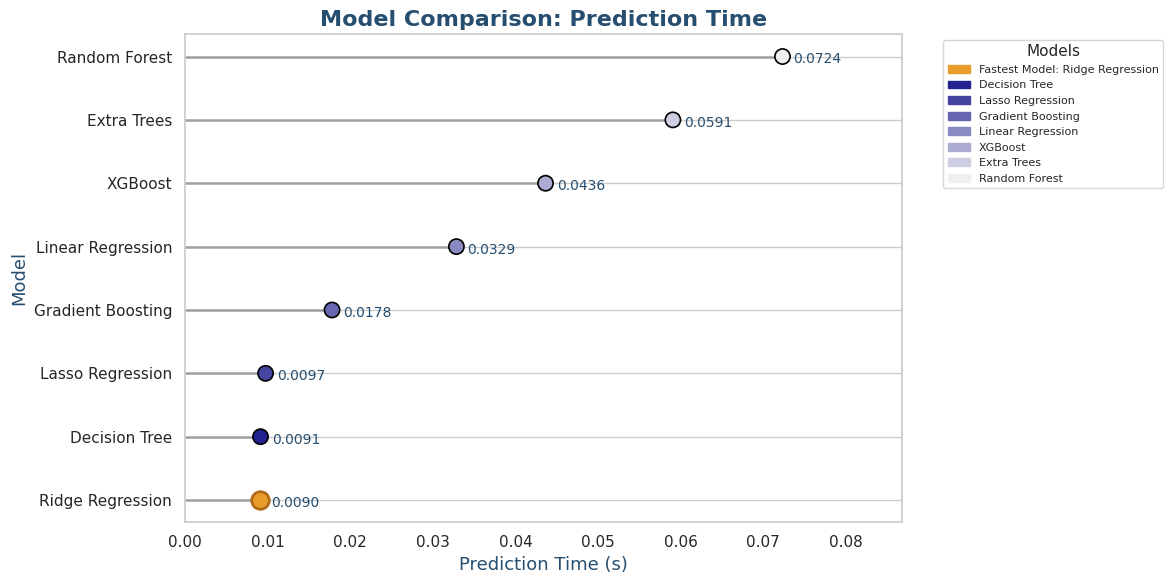

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np

# Sort the DataFrame by 'Prediction Time (s)' to easily visualize performance
sorted_pred_df = results_df.sort_values("Prediction Time (s)", ascending=True).reset_index(drop=True)

# Custom color palette
colors = sns.light_palette("navy", n_colors=len(sorted_pred_df), reverse=True)

plt.figure(figsize=(12, 6))

# Y positions for models
y_pos = np.arange(len(sorted_pred_df))

max_x = sorted_pred_df["Prediction Time (s)"].max()
plt.xlim(0, max_x * 1.2)   # 25% extra space on right

# Plot lollipop stems (lines)
plt.hlines(
    y=y_pos,
    xmin=0,
    xmax=sorted_pred_df["Prediction Time (s)"],
    color="gray",
    alpha=0.6,
    linewidth=2
)

# Plot lollipop markers (dots)
plt.scatter(
    sorted_pred_df["Prediction Time (s)"],
    y_pos,
    s=120,
    color=colors,
    edgecolors="black",
    linewidth=1.2,
    zorder=3
)

# Highlight fastest model
best_index = sorted_pred_df['Prediction Time (s)'].idxmin()
best_y = y_pos[best_index]

# Change fastest model color
plt.scatter(
    sorted_pred_df["Prediction Time (s)"][best_index],
    best_y,
    s=160,
    color="#e89c2c",
    edgecolors='#b36a19',
    linewidth=2,
    zorder=4
)

# Annotate "Fastest"
plt.annotate(
    "",
    (sorted_pred_df["Prediction Time (s)"][best_index], best_y),
    xytext=(12, 8),
    textcoords="offset points",
    fontsize=10,
    color="#b36a19",
    fontweight="bold"
)

# Annotate times next to dots
for i, (time, yv) in enumerate(zip(sorted_pred_df["Prediction Time (s)"], y_pos)):
    plt.annotate(
        f"{time:.4f}",
        (time, yv),
        xytext=(8, -5),
        textcoords="offset points",
        fontsize=10,
        color="#254e70"
    )




# Labels and title
plt.yticks(y_pos, sorted_pred_df["Model"], fontsize=11)
plt.xlabel("Prediction Time (s)", fontsize=13, color="#254e70")
plt.ylabel("Model", fontsize=13, color="#254e70")
plt.title(
    "Model Comparison: Prediction Time",
    fontsize=16,
    color="#254e70",
    fontweight="bold"
)

plt.grid(axis='x', linestyle='', alpha=0.5)

# Legend
legend_handles = []
legend_handles.append(mpatches.Patch(color='#e89c2c', label=f"Fastest Model: {sorted_pred_df['Model'][best_index]}"))

for i in range(len(sorted_pred_df)):
    if i != best_index:
        legend_handles.append(mpatches.Patch(color=colors[i], label=sorted_pred_df['Model'][i]))

plt.legend(
    handles=legend_handles,
    title="Models",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=8,
    title_fontsize=11
)

plt.tight_layout()
plt.show()


/tmp/ipython-input-2937810757.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


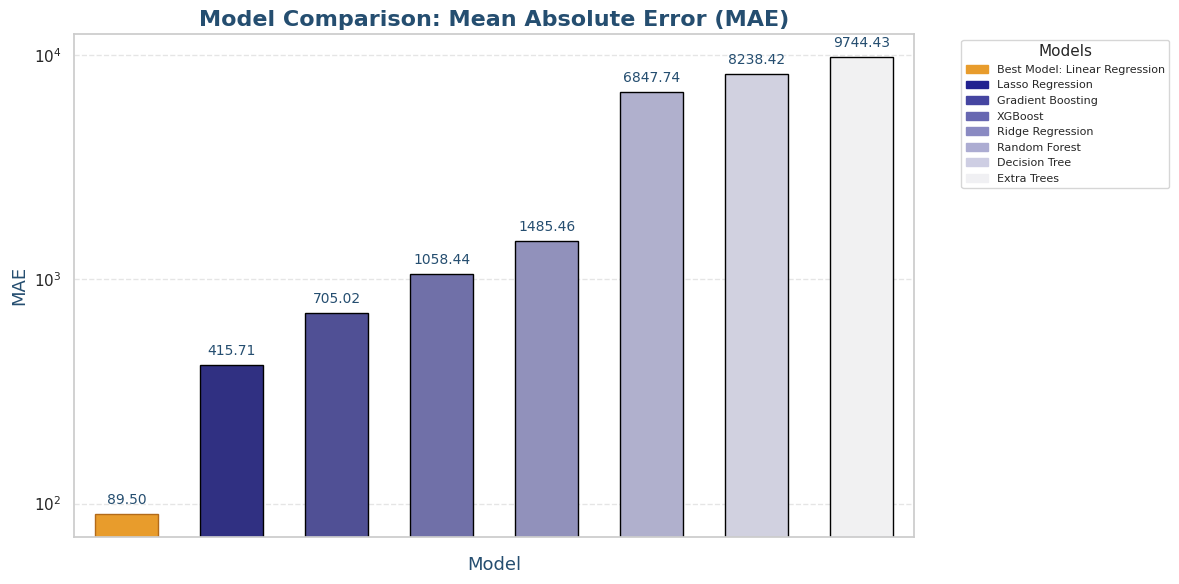

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np

# Sort data by MAE
sorted_df = results_df.sort_values("MAE").reset_index(drop=True)

# Custom color palette
colors = sns.light_palette("navy", n_colors=len(sorted_df), reverse=True)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=sorted_df,
    x="Model",
    y="MAE",
    palette=colors,
    edgecolor='black',
    width=0.6  # ↑ reduce gap (higher width = bars closer)
)

plt.yscale("log")
plt.title("Model Comparison: Mean Absolute Error (MAE)", fontsize=16, color='#254e70', fontweight='bold')
plt.ylabel("MAE", fontsize=13, color='#254e70')
plt.xlabel("Model", fontsize=13, color='#254e70')
plt.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)

# ✅ shift x-tick labels to align with the right edge
plt.xticks(
    ticks=np.arange(len(sorted_df)),
    labels=sorted_df["Model"],
    rotation=30,
    ha='right',  # align right
    fontsize=11
)
# Shift ticks slightly to the right (so labels end at bar’s right edge)
ax.set_xticks(np.arange(len(sorted_df)) + 0.3)  # adjust offset if needed

# Highlight the bar with lowest MAE
best_index = sorted_df['MAE'].idxmin()
for bar_index, p in enumerate(ax.patches):
    if bar_index == best_index:
        p.set_facecolor('#e89c2c')
        p.set_edgecolor('#b36a19')
        ax.annotate("",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    # (p.get_x() + p.get_width(), p.get_height()),  # right edge
                    ha='center', va='bottom', fontsize=10,
                    color='#b36a19', fontweight='bold',
                    xytext=(0, 16), textcoords='offset points')

# Annotate MAE values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10,
                color='#254e70', xytext=(0, 5),
                textcoords='offset points')



# Remove the old legend creation section and replace with this:
legend_handles = []

# Add a "Best Model" patch (highlighted bar)
legend_handles.append(mpatches.Patch(color='#e89c2c', label=f"Best Model: {sorted_df['Model'][best_index]}"))

# Add other models (except the best one)
for i in range(len(sorted_df)):
    if i != best_index:
        legend_handles.append(mpatches.Patch(color=colors[i], label=sorted_df['Model'][i]))

plt.legend(
    handles=legend_handles,
    title="Models",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=8,
    title_fontsize=11
)


plt.tight_layout()
plt.show()


/tmp/ipython-input-1213924904.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


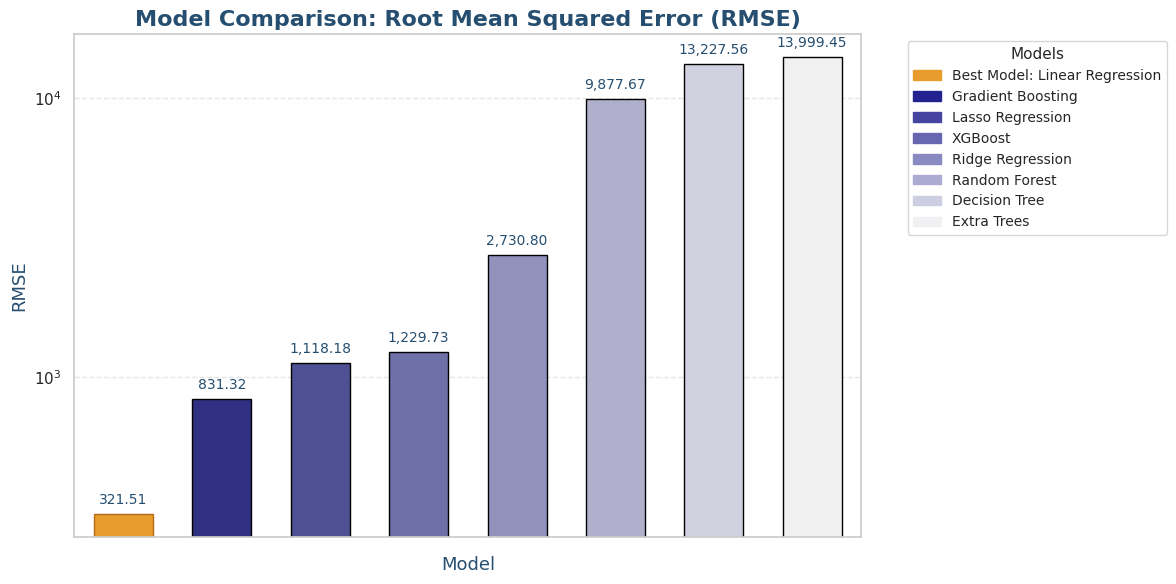

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np

# Sort by RMSE (ascending for "best" = lowest)
sorted_df = results_df.sort_values("RMSE").reset_index(drop=True)


# Custom color palette (same style as MAE plot)
colors = sns.light_palette("navy", n_colors=len(sorted_df), reverse=True)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=sorted_df,
    x="Model",
    y="RMSE",
    palette=colors,
    edgecolor='black',
    width=0.6
)

# Log scale and styling
# plt.yscale("log")
plt.yscale("log")

plt.yscale("log")



plt.title("Model Comparison: Root Mean Squared Error (RMSE)",
          fontsize=16, color='#254e70', fontweight='bold')
plt.ylabel("RMSE", fontsize=13, color='#254e70')
plt.xlabel("Model", fontsize=13, color='#254e70')
plt.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)

# Right-aligned tick labels with slight shift
plt.xticks(
    ticks=np.arange(len(sorted_df)),
    labels=sorted_df["Model"],
    rotation=30,
    ha='right',
    fontsize=11
)
ax.set_xticks(np.arange(len(sorted_df)) + 0.3)  # adjust offset if needed

# Highlight best (lowest RMSE)
best_index = sorted_df['RMSE'].idxmin()
for bar_index, p in enumerate(ax.patches):
    if bar_index == best_index:
        p.set_facecolor('#e89c2c')
        p.set_edgecolor('#b36a19')
        ax.annotate("",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10,
                    color='#b36a19', fontweight='bold',
                    xytext=(0, 16), textcoords='offset points')

# Annotate values with thousands separators to show e.g., 165,660.61
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.2f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10,
                color='#254e70', xytext=(0, 5),
                textcoords='offset points')

# Legend with highlighted "Best Model"
legend_handles = []
legend_handles.append(mpatches.Patch(color='#e89c2c', label=f"Best Model: {sorted_df['Model'][best_index]}"))
for i in range(len(sorted_df)):
    if i != best_index:
        legend_handles.append(mpatches.Patch(color=colors[i], label=sorted_df['Model'][i]))

plt.legend(
    handles=legend_handles,
    title="Models",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=10,
    title_fontsize=11
)

plt.tight_layout()
plt.show()


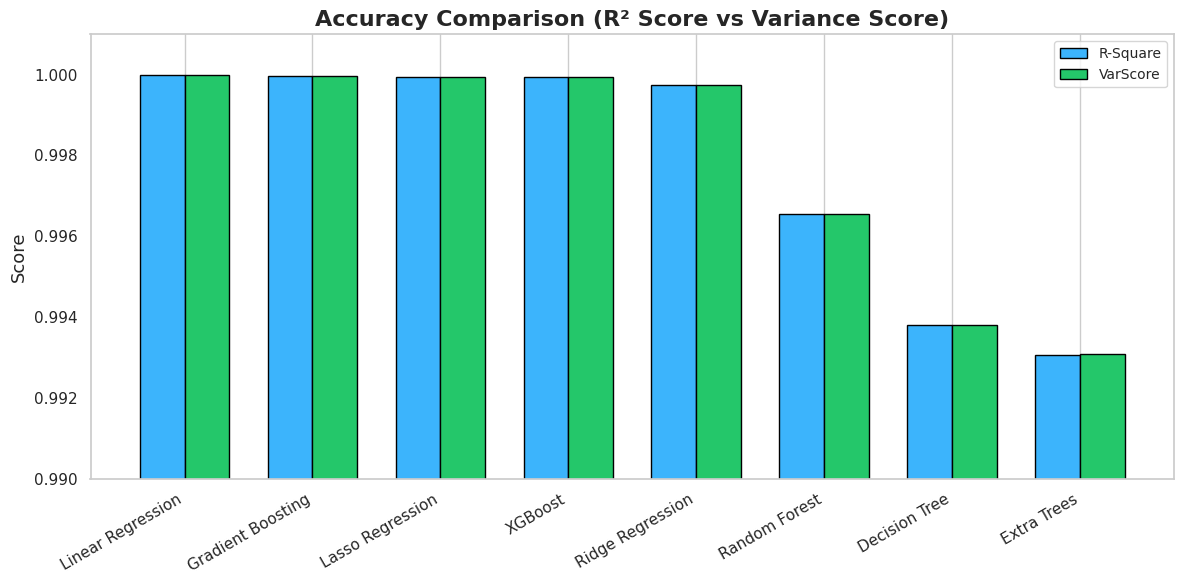

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Copy DataFrame
df = results_df.copy()

# Extract values
models = df["Model"]
r2_scores = df["R2 Score"]
var_scores = df["Var Score"]

# Plot settings
x = np.arange(len(models))             # positions
width = 0.35                           # width of each bar

plt.figure(figsize=(12, 6))

# Color palette
r2_color = "#3cb4fc"   # light blue
var_color = "#24c76a"  # green

# Bars
plt.bar(x - width/2, r2_scores, width, label="R-Square", color=r2_color, edgecolor='black')
plt.bar(x + width/2, var_scores, width, label="VarScore", color=var_color, edgecolor='black')

# Titles and labels
plt.title("Accuracy Comparison (R² Score vs Variance Score)", fontsize=16, fontweight='bold')
plt.ylabel("Score", fontsize=13)
plt.xticks(x, models, rotation=30, ha='right', fontsize=11)

# Grid
# plt.ylim(0, 1.15)
# plt.ylim(0.98, 1.002)
plt.ylim(0.99, 1.001)

plt.grid(axis="y", linestyle="", alpha=0.5)

# Value labels on bars
# for i, v in enumerate(r2_scores):
#     plt.text(i - width/2, v + 0.02, f"{np.floor(v*100)/100:.2f}", ha='center', fontsize=10)

# for i, v in enumerate(var_scores):
#     plt.text(i + width/2, v + 0.02, f"{np.floor(v*100)/100:.2f}", ha='center', fontsize=10)

# Legend
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()
# ------------------------------------------------------------
# import matplotlib.pyplot as plt
# import numpy as np
# import seaborn as sns

# df = results_df.copy()

# models = df["Model"]
# r2_scores = df["R2 Score"]
# var_scores = df["Var Score"]

# x = np.arange(len(models))
# width = 0.35

# plt.figure(figsize=(12, 6))

# # Professional color palette
# r2_color = "#1f77b4"   # blue
# var_color = "#2ca02c"  # green

# # Bars
# plt.bar(x - width/2, r2_scores, width, label="R-Square",
#         color=r2_color, edgecolor='black', linewidth=1)
# plt.bar(x + width/2, var_scores, width, label="Variance Score",
#         color=var_color, edgecolor='black', linewidth=1)

# # Title
# plt.title("Accuracy Comparison of Regression Models", fontsize=18, fontweight='bold')

# # Y-axis zoom
# plt.ylim(0.99, 1.001)

# # Axis labels
# plt.ylabel("Score", fontsize=14)
# plt.xticks(x, models, rotation=25, ha='right', fontsize=12)

# # Clean axis styling (professional)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['left'].set_linewidth(1.2)
# plt.gca().spines['bottom'].set_linewidth(1.2)

# # Add precise value labels (two decimals, floored)
# for i, v in enumerate(r2_scores):
#     plt.text(i - width/2, v + 0.0001, f"{np.floor(v*100)/100:.2f}",
#              ha='center', fontsize=10)

# for i, v in enumerate(var_scores):
#     plt.text(i + width/2, v + 0.0001, f"{np.floor(v*100)/100:.2f}",
#              ha='center', fontsize=10)

# plt.legend(fontsize=12)
# plt.tight_layout()
# plt.show()
# ---------------------------------------------------

# import plotly.graph_objects as go

# df = results_df.copy()

# fig = go.Figure()

# fig.add_trace(go.Bar(
#     x=df["Model"],
#     y=df["R2 Score"],
#     name="R-Square",
#     marker_color="#1f77b4",
#     hovertemplate="R2 Score: %{y}"
# ))

# fig.add_trace(go.Bar(
#     x=df["Model"],
#     y=df["Var Score"],
#     name="Variance Score",
#     marker_color="#2ca02c",
#     hovertemplate="VarScore: %{y}"
# ))

# fig.update_layout(
#     barmode='group',
#     title="Accuracy Comparison of Regression Models",
#     yaxis_title="Score",
#     yaxis=dict(range=[0.99, 1.001]),
#     font=dict(size=14),
#     width=1000,
#     height=500
# )

# fig.show()

# ------------------------------------------------------

# import matplotlib.pyplot as plt
# import numpy as np
# import seaborn as sns

# df = results_df.copy()
# models = df["Model"]
# r2_scores = df["R2 Score"]
# var_scores = df["Var Score"]

# x = np.arange(len(models))
# width = 0.35

# plt.figure(figsize=(12, 6))

# # Gradient colors
# r2_color = sns.light_palette("blue", as_cmap=False)[3]
# var_color = sns.light_palette("green", as_cmap=False)[3]

# plt.bar(x - width/2, r2_scores, width, color=r2_color,
#         label="R-Square", edgecolor="black", linewidth=1.2)
# plt.bar(x + width/2, var_scores, width, color=var_color,
#         label="Variance Score", edgecolor="black", linewidth=1.2)

# plt.title("Accuracy Comparison (R² vs Variance Score)", fontsize=16, fontweight="bold")
# plt.ylabel("Score", fontsize=13)
# plt.xticks(x, models, rotation=25, ha='right')

# plt.ylim(0.99, 1.001)

# # Light shadow
# plt.gca().patch.set_facecolor('#f7f7f7')

# plt.legend()
# plt.tight_layout()
# plt.show()


/tmp/ipython-input-2434873412.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


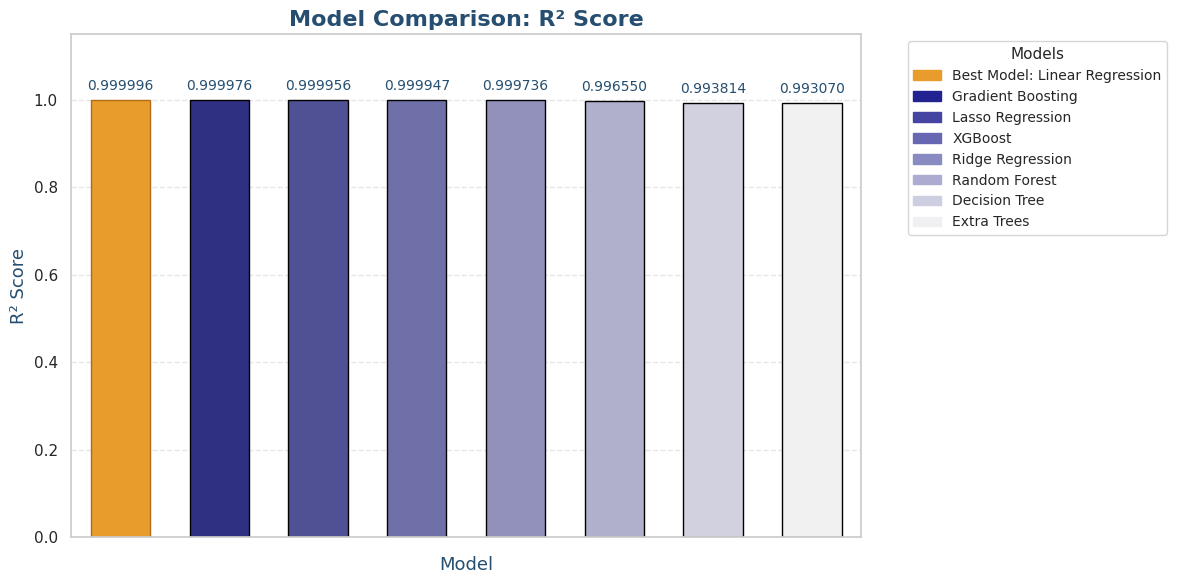

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np

# Make a copy so original isn't mutated
r2_df = results_df.copy()


# Sort by R² descending (best at left)
sorted_df = r2_df.sort_values("R2 Score", ascending=False).reset_index(drop=True)

# Color palette like MAE plot
colors = sns.light_palette("navy", n_colors=len(sorted_df), reverse=True)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=sorted_df,
    x="Model",
    y="R2 Score",
    palette=colors,
    edgecolor='black',
    width=0.6
)

# Title, axes, grid
plt.title("Model Comparison: R² Score",
          fontsize=16, color='#254e70', fontweight='bold')
plt.ylabel("R² Score", fontsize=13, color='#254e70')
plt.xlabel("Model", fontsize=13, color='#254e70')
plt.ylim(0, 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)

# Right-aligned tick labels with slight shift (to mimic MAE plot alignment)
plt.xticks(
    ticks=np.arange(len(sorted_df)),
    labels=sorted_df["Model"],
    rotation=30,
    ha='right',
    fontsize=11
)
ax.set_xticks(np.arange(len(sorted_df)) + 0.3)  # adjust offset if needed

# Highlight best (highest R²)
best_index = sorted_df['R2 Score'].idxmax()
for bar_index, p in enumerate(ax.patches):
    if bar_index == best_index:
        p.set_facecolor('#e89c2c')
        p.set_edgecolor('#b36a19')
        ax.annotate("",
                    (p.get_x() + p.get_width() / 2., p.get_height() if p.get_height() >= 0 else 0),
                    ha='center', va='bottom', fontsize=10,
                    color='#b36a19', fontweight='bold',
                    xytext=(0, 16), textcoords='offset points')

# Annotate values with 6 decimals; place labels above bar for positive,
# and slightly below the bar top for negative to keep readability.
for p in ax.patches:
    height = p.get_height()
    label_y = height if height >= 0 else height - 0.04
    ax.annotate(f"{height:,.6f}",
                (p.get_x() + p.get_width() / 2., label_y),
                ha='center', va='bottom', fontsize=10,
                color='#254e70', xytext=(0, 5 if height >= 0 else 0),
                textcoords='offset points')

# Legend with highlighted "Best Model"
legend_handles = []
legend_handles.append(mpatches.Patch(color='#e89c2c', label=f"Best Model: {sorted_df['Model'][best_index]}"))
for i in range(len(sorted_df)):
    if i != best_index:
        legend_handles.append(mpatches.Patch(color=colors[i], label=sorted_df['Model'][i]))

plt.legend(
    handles=legend_handles,
    title="Models",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=10,
    title_fontsize=11
)

plt.tight_layout()
plt.show()

/tmp/ipython-input-399613811.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


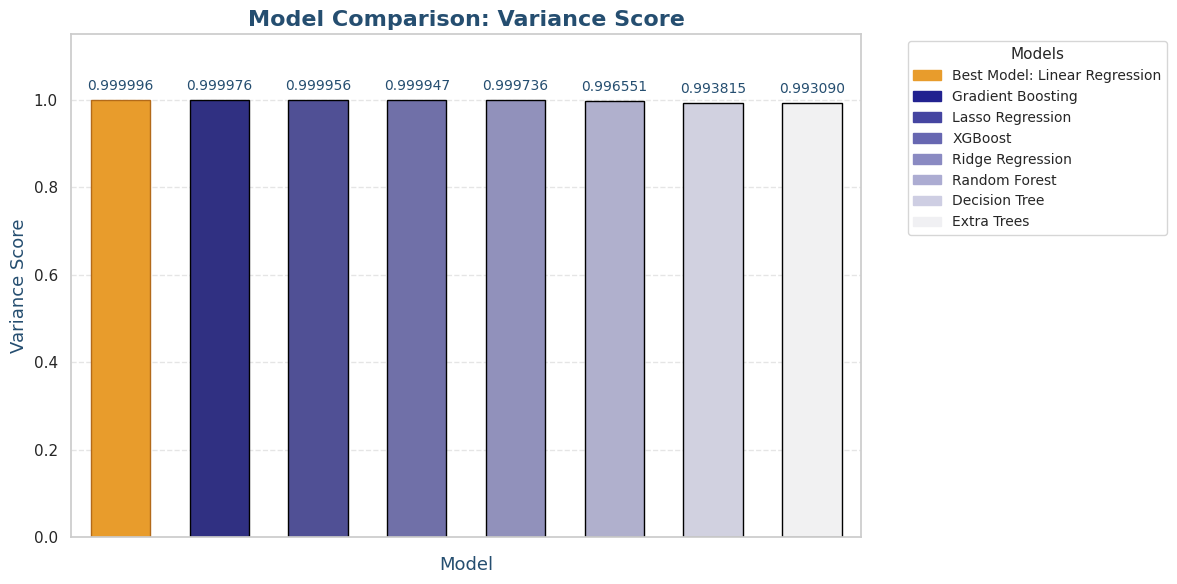

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np

# Make a copy
var_df = results_df.copy()

# Sort by VarScore descending
sorted_var_df = var_df.sort_values("Var Score", ascending=False).reset_index(drop=True)

# Color palette (same style)
colors = sns.light_palette("navy", n_colors=len(sorted_var_df), reverse=True)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=sorted_var_df,
    x="Model",
    y="Var Score",
    palette=colors,
    edgecolor='black',
    width=0.6
)

# Title, labels, grid
plt.title("Model Comparison: Variance Score",
          fontsize=16, color='#254e70', fontweight='bold')
plt.ylabel("Variance Score", fontsize=13, color='#254e70')
plt.xlabel("Model", fontsize=13, color='#254e70')
plt.ylim(0, 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)

# X-axis formatting
plt.xticks(
    ticks=np.arange(len(sorted_var_df)),
    labels=sorted_var_df["Model"],
    rotation=30,
    ha='right',
    fontsize=11
)
ax.set_xticks(np.arange(len(sorted_var_df)) + 0.3)

# Highlight best (highest VarScore)
best_index = sorted_var_df['Var Score'].idxmax()
for bar_index, p in enumerate(ax.patches):
    if bar_index == best_index:
        p.set_facecolor('#e89c2c')
        p.set_edgecolor('#b36a19')
        ax.annotate("",
                    (p.get_x() + p.get_width() / 2.,
                     p.get_height() if p.get_height() >= 0 else 0),
                    ha='center', va='bottom', fontsize=10,
                    color='#b36a19', fontweight='bold',
                    xytext=(0, 16), textcoords='offset points')

# Annotate values
for p in ax.patches:
    height = p.get_height()
    label_y = height if height >= 0 else height - 0.04
    ax.annotate(f"{height:,.6f}",
                (p.get_x() + p.get_width() / 2., label_y),
                ha='center', va='bottom', fontsize=10,
                color='#254e70',
                xytext=(0, 5 if height >= 0 else 0),
                textcoords='offset points')

# Legend
legend_handles = []
legend_handles.append(mpatches.Patch(color='#e89c2c',
                                     label=f"Best Model: {sorted_var_df['Model'][best_index]}"))
for i in range(len(sorted_var_df)):
    if i != best_index:
        legend_handles.append(mpatches.Patch(color=colors[i], label=sorted_var_df['Model'][i]))

plt.legend(
    handles=legend_handles,
    title="Models",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=10,
    title_fontsize=11
)

plt.tight_layout()
plt.show()


Generating plot for: XGBoost
Generating plot for: Linear Regression
Generating plot for: Random Forest
Generating plot for: Gradient Boosting
Generating plot for: Ridge Regression
Generating plot for: Decision Tree
Generating plot for: Lasso Regression
Generating plot for: Extra Trees


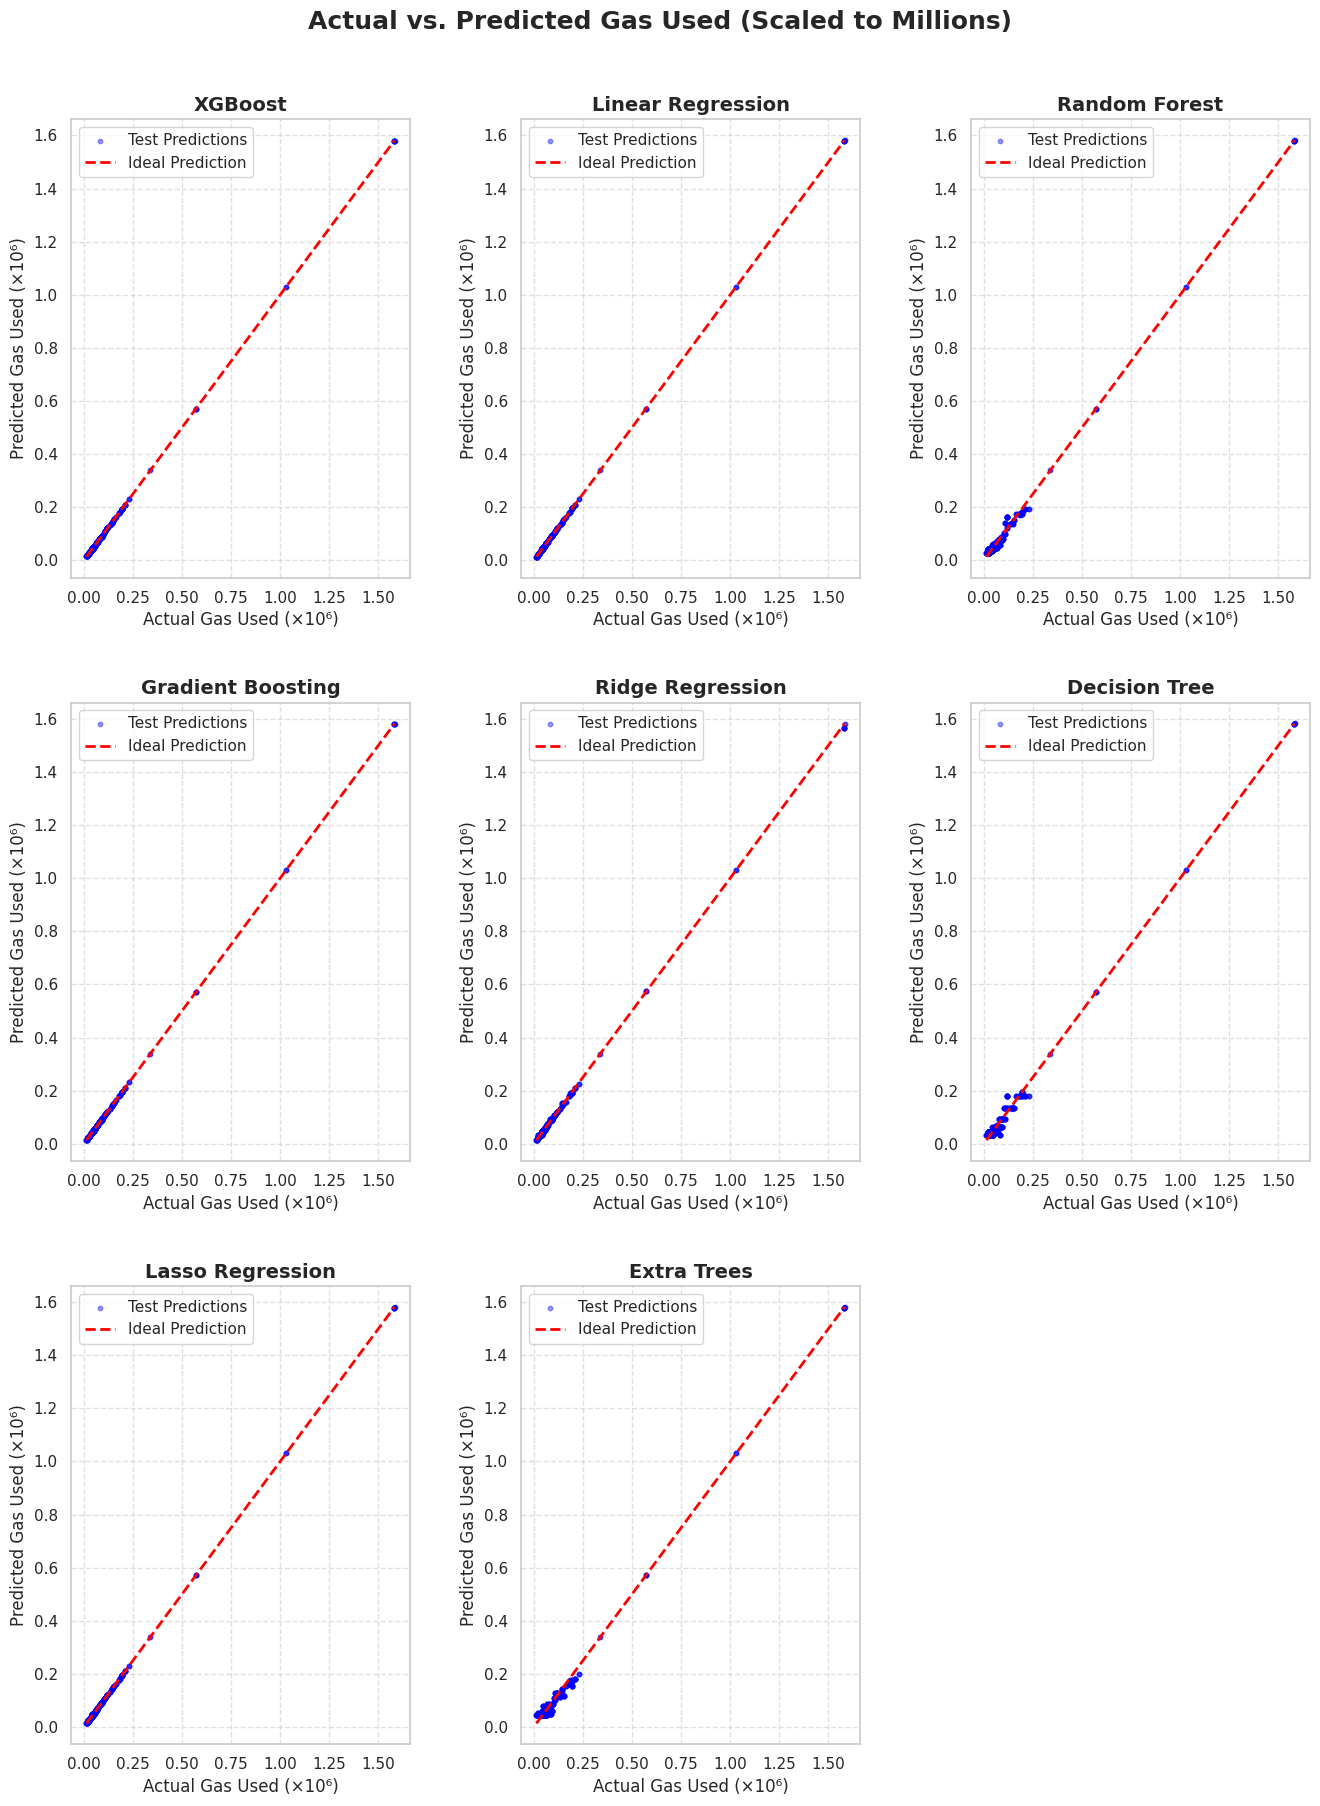

In [ ]:
# --- Regression Line Plots for All Models (Only Ideal Line + Actual vs Predicted) ---
import matplotlib.ticker as tkr

num_models = len(models)
n_cols = 3
n_rows = (num_models + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 6))
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    print(f"Generating plot for: {name}")

    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])

    pipeline.fit(X_train, y_train)
    y_test_pred = pipeline.predict(X_test)

    # Scale values to millions
    y_test_scaled = y_test / 1e6
    y_pred_scaled = y_test_pred / 1e6

    ax = axes[i]

    # --- Scatter Plot (Blue) ---
    scatter = ax.scatter(
        y_test_scaled, y_pred_scaled,
        alpha=0.4, s=10, color="blue", label="Test Predictions"
    )

    # --- Ideal Line ---
    min_val = min(y_test_scaled.min(), y_pred_scaled.min())
    max_val = max(y_test_scaled.max(), y_pred_scaled.max())

    ideal_line, = ax.plot(
        [min_val, max_val], [min_val, max_val],
        color="red", linestyle='--', linewidth=2,
        label="Ideal Prediction"
    )

    # --- Turn off scientific notation ---
    ax.ticklabel_format(style='plain')

    # --- Axis labels with scale notation ---
    ax.set_xlabel("Actual Gas Used (×10⁶)", fontsize=12)
    ax.set_ylabel("Predicted Gas Used (×10⁶)", fontsize=12)

    # --- Force legend handles so colors don't change ---
    ax.legend(handles=[scatter, ideal_line], loc='upper left')

    ax.set_title(f"{name}", fontsize=14, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_aspect('auto')

# Remove extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3.0)
plt.suptitle("Actual vs. Predicted Gas Used (Scaled to Millions)",
             fontsize=18, y=1.02, fontweight='bold')
plt.show()


In [ ]:
# === Train and evaluate models ===
results = []

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    pipeline.fit(X_train, y_train)

    # Evaluate on training set
    y_train_pred = pipeline.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)

    # Evaluate on test set
    y_test_pred = pipeline.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)


    results.append({
        "Model": name,
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse,
        "Train R² Score": train_r2,
        "Test R² Score": test_r2
    })

results_df = pd.DataFrame(results)
print(results_df)

               Model    Train MAE     Test MAE    Train RMSE     Test RMSE  \
0            XGBoost  1019.145264  1058.435913   1188.300520   1229.727002   
1  Linear Regression    72.792845    89.500218    276.441262    321.506024   
2      Random Forest  6580.830168  6847.735856   9587.657461   9877.672102   
3  Gradient Boosting   670.035947   705.016564    792.295505    831.322142   
4   Ridge Regression  1344.441374  1485.462223   2459.120614   2730.800981   
5      Decision Tree  8019.098137  8238.423611  12768.164446  13227.562370   
6   Lasso Regression   406.471460   415.713763   1067.510649   1118.175800   
7        Extra Trees  9305.801791  9744.433886  13180.489061  13999.445078   

   Train R² Score  Test R² Score  
0        0.999954       0.999947  
1        0.999998       0.999996  
2        0.997019       0.996550  
3        0.999980       0.999976  
4        0.999804       0.999736  
5        0.994713       0.993814  
6        0.999963       0.999956  
7        0.994366